In [ ]:
!pip install --upgrade pylangacq
!pip install --upgrade taaled
#!pip uninstall pylats
!python -m spacy download es_core_news_sm
!python -m spacy download es_dep_news_trf
!python -m spacy download en_core_web_trf
!pip install pylats
!pip install spacy
!pip install spacy-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 6.9 MB/s 
     |████████████████████████████████| 4.6 MB 41.2 MB/s 
  Created wheel for taaled: filename=taaled-0.32-py3-none-any.whl size=1478290 sha256=3c61555d9f849457b88a8e14ea21bf4fc1c13674dd43762ab1dc32677d6c4deb
  Stored in directory: /root/.cache/pip/wheels/10/a1/5a/4d09a82349c90da892161c35346b65df5a3081b689bf85c5af
  Created wheel for pylats: filename=pylats-0.37-py3-none-any.whl size=4725020 sha256=5f9d6bfc5420adb87ca4b4a19e062fcfe05b0a08aedd709a5c8a60fdf5155cac
  Stored in directory: /root/.cache/pip/wheels/68/64/c8/1b0e90b6f47e15c7adb4f7275519863c6e3749f200ca602f66
Successfully built taaled pylats
2022-11-17 08:22:05.711442: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] 

In [ ]:
import pylangacq as pla
import pandas as pd
import glob
import spacy
from taaled import ld
import re
import string

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Reading CHAT data

In [ ]:
reader = pla.read_chat('/content/drive/MyDrive/transcription/Control/cookie', encoding = 'utf-8')

In [ ]:
demreader=pla.read_chat('/content/drive/MyDrive/transcription/Dementia/cookie', encoding = 'utf-8')

In [ ]:
totalFiles=reader.n_files()
totalFiles

243

In [ ]:
totalDem=demreader.n_files()
totalDem

305

In [ ]:
totalFiles+totalDem

548

In [ ]:
reader.participants()

{'INV', 'PAR'}

In [ ]:
files=reader.info()

243 files
3896 utterances
33931 words
      Utterance Count    Word Count  File Path
--  -----------------  ------------  -------------------------------------------------------------
#1                 21           173  /content/drive/MyDrive/transcription/Control/cookie/002-0.cha
#2                 20           139  /content/drive/MyDrive/transcription/Control/cookie/002-1.cha
#3                 18           195  /content/drive/MyDrive/transcription/Control/cookie/002-2.cha
#4                 14           210  /content/drive/MyDrive/transcription/Control/cookie/002-3.cha
#5                 16           115  /content/drive/MyDrive/transcription/Control/cookie/006-2.cha
...
(set `verbose` to True for all the files)


In [ ]:
files=demreader.info()

305 files
5585 utterances
43471 words
      Utterance Count    Word Count  File Path
--  -----------------  ------------  --------------------------------------------------------------
#1                 13           115  /content/drive/MyDrive/transcription/Dementia/cookie/001-0.cha
#2                 21           160  /content/drive/MyDrive/transcription/Dementia/cookie/001-2.cha
#3                 28           240  /content/drive/MyDrive/transcription/Dementia/cookie/003-0.cha
#4                 13            89  /content/drive/MyDrive/transcription/Dementia/cookie/005-0.cha
#5                 19            74  /content/drive/MyDrive/transcription/Dementia/cookie/005-2.cha
...
(set `verbose` to True for all the files)


In [ ]:
info=reader.words(participants="PAR", by_files=True)
info[0:2][:20]

[['the',
  'scene',
  'is',
  'in',
  'the',
  'kitchen',
  '.',
  'the',
  'mother',
  'is',
  'wiping',
  'dishes',
  'and',
  'the',
  'water',
  'is',
  'running',
  'on',
  'the',
  'floor',
  '.',
  'a',
  'boy',
  'is',
  'trying',
  'to',
  'get',
  'cookies',
  'out',
  'of',
  'a',
  'jar',
  'and',
  "he's",
  'about',
  'to',
  'tip',
  'over',
  'on',
  'a',
  'stool',
  '.',
  'the',
  'little',
  'girl',
  'is',
  'reacting',
  'to',
  'his',
  'falling',
  '.',
  'it',
  'seems',
  'to',
  'be',
  'summer',
  'out',
  '.',
  'the',
  'window',
  'is',
  'open',
  '.',
  'the',
  'curtains',
  'are',
  'blowing',
  '.',
  'it',
  'must',
  'be',
  'a',
  'gentle',
  'breeze',
  '.',
  "there's",
  'grass',
  'outside',
  'in',
  'the',
  'garden',
  '.',
  "mother's",
  'finished',
  'certain',
  'of',
  'the',
  'dishes',
  '.',
  "kitchen's",
  'very',
  'tidy',
  '.',
  'the',
  'mother',
  'seems',
  'to',
  'have',
  'nothing',
  'in',
  'the',
  'house',
  'to',
  

# Metadata

In [ ]:
headersinfo=demreader.headers()
headersinfo[:17]

[{'UTF8': '',
  'PID': '11312/t-00002420-1',
  'Languages': ['eng'],
  'Participants': {'PAR': {'name': 'Participant',
    'language': 'eng',
    'corpus': 'Pitt',
    'age': '57;',
    'sex': 'male',
    'group': 'ProbableAD',
    'ses': '',
    'role': 'Participant',
    'education': '18',
    'custom': ''},
   'INV': {'name': 'Investigator',
    'language': 'eng',
    'corpus': 'Pitt',
    'age': '',
    'sex': '',
    'group': '',
    'ses': '',
    'role': 'Investigator',
    'education': '',
    'custom': ''}},
  'Media': '001-0, audio',
  'Comment': 'another audio testing file overlaps in background',
  'G': 'Cookie'},
 {'UTF8': '',
  'PID': '11312/t-00002421-1',
  'Languages': ['eng'],
  'Participants': {'PAR': {'name': 'Participant',
    'language': 'eng',
    'corpus': 'Pitt',
    'age': '59;',
    'sex': 'male',
    'group': 'ProbableAD',
    'ses': '',
    'role': 'Participant',
    'education': '11',
    'custom': ''},
   'INV': {'name': 'Investigator',
    'language': 'en

# Transcriptions and annotations

http://pylangacq.org/transcriptions.html#transcriptions    
http://pylangacq.org/transcriptions.html#cds

Transcriptions and annotations from the %mor and %gra tiers (for morphology, part-of-speech tags, and grammatical relations) are accessible via NLTK-like corpus access methods such as words(), tagged_words(), sents(), and tagged_sents(). By default, these methods return an object “X” lumping together results from all the files. If we are interested in return objects for individual files and therefore need the file structure, these methods take the optional parameter by_files: if True, the return object is “dict(filename: X for that file)” a dict mapping an absolute-path filename to the method’s return object for that file (similar to age() introduced above). For example, to check out the word counts in eve

In [ ]:
_filereader = pla.read_chat(path='/content/drive/MyDrive/transcription/Dementia/cookie/010-4.cha')

In [ ]:
print(_filereader.info())

1 files
19 utterances
103 words
None


In [ ]:
_filereader.words(participants="PAR", by_utterances=True)

[['kids', 'are', 'trying', 'to', 'get', 'a', '...'],
 ["it's", 'full', 'of', 'mistakes', '.'],
 ["it's", 'full', 'of', 'mistakes', '.'],
 ["it's", 'full', 'of', 'mistakes', '.'],
 ["he's", 'taking', 'cookie', 'jar', '.'],
 ["that's", 'all', '.'],
 ['the', "mother's", 'just', 'drying', 'the', 'dishes', '.'],
 ['from', 'the', 'from', '.'],
 ['this', 'is', '...'],
 ['.']]

In [ ]:
_filereader.words(participants="PAR", by_utterances=False)

['kids',
 'are',
 'trying',
 'to',
 'get',
 'a',
 '...',
 "it's",
 'full',
 'of',
 'mistakes',
 '.',
 "it's",
 'full',
 'of',
 'mistakes',
 '.',
 "it's",
 'full',
 'of',
 'mistakes',
 '.',
 "he's",
 'taking',
 'cookie',
 'jar',
 '.',
 "that's",
 'all',
 '.',
 'the',
 "mother's",
 'just',
 'drying',
 'the',
 'dishes',
 '.',
 'from',
 'the',
 'from',
 '.',
 'this',
 'is',
 '...',
 '.']

In [ ]:
# The “tagged” methods represent a word as a tuple of (word, pos, mor, rel)
# where pos is the part-of-speech tag, mor is the morphological information,
# rel is the dependency and grammatical relation:

file_tokens=_filereader.tokens(participants="PAR", by_utterances=True)
top5tokens=file_tokens[:5]
top5tokens

[[Token(word='kids', pos='n', mor='kid-PL', gra=Gra(dep=1, head=3, rel='SUBJ')),
  Token(word='are', pos='aux', mor='be&PRES', gra=Gra(dep=2, head=3, rel='AUX')),
  Token(word='trying', pos='part', mor='try-PRESP', gra=Gra(dep=3, head=0, rel='ROOT')),
  Token(word='to', pos='inf', mor='to', gra=Gra(dep=4, head=5, rel='INF')),
  Token(word='get', pos='v', mor='get', gra=Gra(dep=5, head=3, rel='COMP')),
  Token(word='a', pos='det:art', mor='a', gra=Gra(dep=6, head=5, rel='PRED')),
  Token(word='...', pos='+...', mor='', gra=Gra(dep=7, head=3, rel='PUNCT'))],
 [Token(word="it's", pos='pro:per', mor='it', gra=Gra(dep=1, head=2, rel='SUBJ')),
  Token(word='CLITIC', pos='cop', mor='be&3S', gra=Gra(dep=2, head=0, rel='ROOT')),
  Token(word='full', pos='adj', mor='full', gra=Gra(dep=3, head=2, rel='PRED')),
  Token(word='of', pos='prep', mor='of', gra=Gra(dep=4, head=3, rel='JCT')),
  Token(word='mistakes', pos='n', mor='mistake-PL', gra=Gra(dep=5, head=4, rel='POBJ')),
  Token(word='.', pos='

In [ ]:
for token in top5tokens[1]:
  print("word:", token.word)
  print("part-of-speech tag:", token.pos)
  print("morphological information:", token.mor)
  print("grammatical relation:", token.gra)

word: it's
part-of-speech tag: pro:per
morphological information: it
grammatical relation: Gra(dep=1, head=2, rel='SUBJ')
word: CLITIC
part-of-speech tag: cop
morphological information: be&3S
grammatical relation: Gra(dep=2, head=0, rel='ROOT')
word: full
part-of-speech tag: adj
morphological information: full
grammatical relation: Gra(dep=3, head=2, rel='PRED')
word: of
part-of-speech tag: prep
morphological information: of
grammatical relation: Gra(dep=4, head=3, rel='JCT')
word: mistakes
part-of-speech tag: n
morphological information: mistake-PL
grammatical relation: Gra(dep=5, head=4, rel='POBJ')
word: .
part-of-speech tag: .
morphological information: 
grammatical relation: Gra(dep=6, head=2, rel='PUNCT')


In [ ]:
utterlist=_filereader.utterances(participants="PAR")
utterlist[:1]

[Utterance(participant='PAR', tokens=[Token(word='kids', pos='n', mor='kid-PL', gra=Gra(dep=1, head=3, rel='SUBJ')), Token(word='are', pos='aux', mor='be&PRES', gra=Gra(dep=2, head=3, rel='AUX')), Token(word='trying', pos='part', mor='try-PRESP', gra=Gra(dep=3, head=0, rel='ROOT')), Token(word='to', pos='inf', mor='to', gra=Gra(dep=4, head=5, rel='INF')), Token(word='get', pos='v', mor='get', gra=Gra(dep=5, head=3, rel='COMP')), Token(word='a', pos='det:art', mor='a', gra=Gra(dep=6, head=5, rel='PRED')), Token(word='...', pos='+...', mor='', gra=Gra(dep=7, head=3, rel='PUNCT'))], time_marks=(3348, 9824), tiers={'PAR': 'kids are trying to get a &s [x 6] +... \x153348_9824\x15', '%mor': 'n|kid-PL aux|be&PRES part|try-PRESP inf|to v|get det:art|a +...', '%gra': '1|3|SUBJ 2|3|AUX 3|0|ROOT 4|5|INF 5|3|COMP 6|5|PRED 7|3|PUNCT'})]

To check if a method has the optional argument participant, please see the complete list of methods for the Reader class in chat — Reading and parsing CHAT transcripts.

# Utterances

In [ ]:
file_sentences = _filereader.sents(participants='PAR')
file_sentences



/usr/local/lib/python3.7/dist-packages/pylangacq/chat.py:212: FutureWarning: 'words' has been deprecated since PyLangAcq v0.13.0. Please use the `.words()` method with by_utterances=True instead.


[['kids', 'are', 'trying', 'to', 'get', 'a', '...'],
 ["it's", 'CLITIC', 'full', 'of', 'mistakes', '.'],
 ["it's", 'CLITIC', 'full', 'of', 'mistakes', '.'],
 ["it's", 'CLITIC', 'full', 'of', 'mistakes', '.'],
 ["he's", 'CLITIC', 'taking', 'cookie', 'jar', '.'],
 ["that's", 'CLITIC', 'all', '.'],
 ['the', "mother's", 'CLITIC', 'just', 'drying', 'the', 'dishes', '.'],
 ['from', 'the', 'from', '.'],
 ['this', 'is', '...'],
 ['.']]

# Creating Dataframe

In [ ]:
control_sentences=reader.sents(participants="PAR")
control_taggedtokens=reader.tokens(participants="PAR", by_utterances=True)
group = list(['Control']*len(control_taggedtokens))
len(control_sentences)

3120

In [ ]:
control_df = pd.DataFrame(
    {'utterances': control_sentences,
     'taggeg': control_taggedtokens,
     'group': group
    })

In [ ]:
control_df.head()

,utterances,taggeg,group
0,"[the, scene, is, in, the, kitchen, .]","[Token(word='the', pos='det:art', mor='the', g...",Control
1,"[the, mother, is, wiping, dishes, and, the, wa...","[Token(word='the', pos='det:art', mor='the', g...",Control
2,"[a, boy, is, trying, to, get, cookies, out, of...","[Token(word='a', pos='det:art', mor='a', gra=G...",Control
3,"[the, little, girl, is, reacting, to, his, fal...","[Token(word='the', pos='det:art', mor='the', g...",Control
4,"[it, seems, to, be, summer, out, .]","[Token(word='it', pos='pro:per', mor='it', gra...",Control


In [ ]:
demreader = pla.read_chat('/content/drive/MyDrive/transcription/Dementia/cookie', encoding = 'utf-8')

demtagged = demreader.tokens(participants='PAR', by_utterances=True)
group = list(['Control']*len(demtagged))
demsentences = demreader.sents(participants='PAR')
len(demsentences)

/usr/local/lib/python3.7/dist-packages/pylangacq/chat.py:212: FutureWarning: 'words' has been deprecated since PyLangAcq v0.13.0. Please use the `.words()` method with by_utterances=True instead.


3824

In [ ]:
files=demreader.file_paths()
len(files)

305

In [ ]:
dementia_df = pd.DataFrame(
    {'utterances': demsentences,
     'taggeg': demtagged,
     'group': group
    })
dementia_df.head()

,utterances,taggeg,group
0,"[mhm, .]","[Token(word='mhm', pos='co', mor='mhm=yes', gr...",Control
1,"[alright, .]","[Token(word='alright', pos='co', mor='alright'...",Control
2,"[there's, CLITIC, a, young, boy, that's, CLITI...","[Token(word=""there's"", pos='pro:exist', mor='t...",Control
3,"[and, he's, CLITIC, in, bad, shape, because, t...","[Token(word='and', pos='coord', mor='and', gra...",Control
4,"[and, in, the, picture, the, mother, is, washi...","[Token(word='and', pos='coord', mor='and', gra...",Control


# Dataset preparation

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
path_control = '/content/drive/MyDrive/transcription/Control/cookie/*.cha'
path_dementia = '/content/drive/MyDrive/transcription/Dementia/cookie/*.cha'

files_control = sorted(glob.glob(path_control))
files_dementia = sorted(glob.glob(path_dementia))

In [ ]:
def extract_participant(file):
    par_re = re.compile(r'^\*PAR:\s(.*)')
    cont_re = re.compile(r'^\t(.*)')

    document = open(file).read()
    doc = document.split('\n')

    pre_list = []
    in_par = False
    for line in doc:
        pattern = cont_re if in_par else par_re

        match = pattern.match(line)

        if match:
            utterance = match.group(1)
            utterance = re.sub('\\x15.*\\x15$', '', utterance)
            pre_list.append(utterance)

            in_par = True
        else:
            in_par = False

    return(pre_list)

In [ ]:
utterances_symbol_control = [extract_participant(f) for f in files_control]
utterances_symbol_dementia = [extract_participant(f) for f in files_dementia]

control_df = pd.DataFrame(
    {'label': 0,   # Control = 0
     'sentence': utterances_symbol_control
     })

dementia_df = pd.DataFrame(
    {'label': 1,    # Dementia = 1
     'sentence': utterances_symbol_dementia
     })



In [ ]:
control_df

,label,sentence
0,0,"[the scene is <in the> [/] in the kitchen . , ..."
1,0,"[oh I see the sink is running over . , I see t..."
2,0,[&um a boy and a girl are in the kitchen with ...
3,0,"[okay . [+ exc] , it was summertime and mother..."
4,0,[&=clears:throat wait (un)til I put my glasses...
...,...,...
238,0,[well the little girl is reaching for a cookie...
239,0,"[mhm . [+ exc] , mhm a_lot_of things are happe..."
240,0,"[alright . [+ exc] , the little boy [//] girl'..."
241,0,"[okay . [+ exc] , well in the first place the ..."


In [ ]:
dementia_df

,label,sentence
0,1,"[mhm . [+ exc] , +< alright . [+ exc] , there'..."
1,1,"[mhm . , there's a young boy &uh going in a co..."
2,1,"[here's a cookie jar . , and the lid is off th..."
3,1,"[the boy is slipping off the stool . , he's tr..."
4,1,[okay he's fallin(g) off a chair [: stool] [* ...
...,...,...
300,1,[well the little kid's falling off his chair [...
301,1,"[mhm . [+ exc] , well this one is in the cooki..."
302,1,"[hm . [+ exc] , the little boy is on the stool..."
303,1,"[oh you want me to tell you . [+ exc] , the mo..."


In [ ]:
df_temp = pd.concat([control_df, dementia_df])
df_temp = shuffle(df_temp).reset_index(drop=True)
df_temp['text'] = df_temp.apply(lambda row: ' '.join(row.sentence), axis=1)

df = df_temp.copy()

df

,label,sentence,text
0,1,"[water's runnin(g) over the sink . , and she's...",water's runnin(g) over the sink . and she's i...
1,1,"[yes . [+ exc] , the water ? [+ exc] , well le...",yes . [+ exc] the water ? [+ exc] well let's...
2,0,"[well I see the sink overflowin(g) . , the mot...",well I see the sink overflowin(g) . the mothe...
3,1,[well the kid is it fallin(g) off the stool &=...,well the kid is it fallin(g) off the stool &=l...
4,1,"[what's going on ? [+ exc] , well she's doing ...",what's going on ? [+ exc] well she's doing th...
...,...,...,...
543,1,"[this picture ? [+ exc] [+ gram] , well, there...","this picture ? [+ exc] [+ gram] well, there's..."
544,1,"[okay . [+ exc] , the boy is getting cookies f...",okay . [+ exc] the boy is getting cookies fro...
545,1,[&=clears:throat okay Junior's in the <kɪkɪ@u ...,&=clears:throat okay Junior's in the <kɪkɪ@u [...
546,1,"[wahoo ho ho . [+ exc] , well it's kind_of a c...",wahoo ho ho . [+ exc] well it's kind_of a cal...


In [ ]:
df['text'][1]

"yes . [+ exc]  the water ? [+ exc]  well let's see . [+ exc]  there's something hasta be where the water goes down over . [+ gram]  &uh there's probably something that's &uh +...  or they don't have it open or [/] or something might ha(ve) +//.  I dunno [: don't know] . [+ exc]  what &uh +..? [+ exc]  when the water goes down &=finger:tap what [/] what do you call that ? [+ exc]  this here . [+ exc]  right here . [+ exc]  this . [+ exc]  what [/] &uh what do you call that ? [+ exc]  what is that ? [+ exc]  what is that ? [+ exc]  I don't know ! [+ exc]  that's what I'm saying . [+ exc]  I [/] I don't know what that is . [+ exc]  +< the what ? [+ exc]  a pipe . [+ exc]  oh [x 3] water pipe ! [+ exc]  oh yeah . [+ exc]  okay . [+ exc]  well then maybe the water pipe is &uh broke [//] &er &uh not broke but &uh there must be things in there +/.  +, that the water will not go down .  I don't know . [+ exc]  huh ? [+ exc]  what's happening to the water ? [+ exc]  well the water is &g going 

# POS tagging using spaCy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def tagged_dialogue(dialogue):
    tagged = [(token.text, token.pos_) for token in nlp(dialogue)]  # To get tag and dep labels, replace pos_ by tag_ and dep_. See spacy documentation for meanings.
    tagged_temp = [' '.join(j) for j in tagged]
    tagged_final = ' '.join(tagged_temp)
    return(tagged_final)

df['pos_text'] = df.apply(lambda x: tagged_dialogue(x['text']), axis = 1 )

In [ ]:
df

,label,sentence,text,pos_text
0,1,"[water's runnin(g) over the sink . , and she's...",water's runnin(g) over the sink . and she's i...,water NOUN 's PART runnin(g NOUN ) PUNCT over ...
1,1,"[yes . [+ exc] , the water ? [+ exc] , well le...",yes . [+ exc] the water ? [+ exc] well let's...,yes INTJ . PUNCT [ X + X exc X ] X SPACE the...
2,0,"[well I see the sink overflowin(g) . , the mot...",well I see the sink overflowin(g) . the mothe...,well INTJ I PRON see VERB the DET sink NOUN ov...
3,1,[well the kid is it fallin(g) off the stool &=...,well the kid is it fallin(g) off the stool &=l...,well INTJ the DET kid NOUN is AUX it PRON fall...
4,1,"[what's going on ? [+ exc] , well she's doing ...",what's going on ? [+ exc] well she's doing th...,what PRON 's AUX going VERB on ADP ? PUNCT [ X...
...,...,...,...,...
543,1,"[this picture ? [+ exc] [+ gram] , well, there...","this picture ? [+ exc] [+ gram] well, there's...",this DET picture NOUN ? PUNCT [ X + X exc NOUN...
544,1,"[okay . [+ exc] , the boy is getting cookies f...",okay . [+ exc] the boy is getting cookies fro...,okay INTJ . PUNCT [ X + X exc X ] X SPACE th...
545,1,[&=clears:throat okay Junior's in the <kɪkɪ@u ...,&=clears:throat okay Junior's in the <kɪkɪ@u [...,& CCONJ = NOUN clears VERB : PUNCT throat NOUN...
546,1,"[wahoo ho ho . [+ exc] , well it's kind_of a c...",wahoo ho ho . [+ exc] well it's kind_of a cal...,wahoo PROPN ho PROPN ho PROPN . PUNCT [ X + X ...


In [ ]:
def only_tags(dialogue):
    tagged = [(token.text, token.pos_) for token in nlp(dialogue)]
    tagged_temp = [i[1] for i in tagged]
    tag_final = ' '.join(tagged_temp)
    return(tag_final)

df['pos_'] = df.apply(lambda x: only_tags(x['text']), axis = 1 )

In [ ]:
df['text'][0]

"water's runnin(g) over the sink .  and she's ignoring it .  and the kid just grabbin(g) the cookies and she's ignorin(g) that .  she's &ig practic(ally) ignoring everything .  the kid's fallin(g) and the &um +...  what else do you want &=laughs ? [+ exc]  he's ready to fall .  his problem's the water's comin(g) over, he's ready to fall down and (.) danger !  there's danger there or something .  I don't know what you want . [+ exc] "

In [ ]:
df['pos_text'][0]

"water NOUN 's PART runnin(g NOUN ) PUNCT over ADP the DET sink NOUN . PUNCT   SPACE and CCONJ she PRON 's AUX ignoring VERB it PRON . PUNCT   SPACE and CCONJ the DET kid NOUN just ADV grabbin(g ADJ ) PUNCT the DET cookies NOUN and CCONJ she PRON 's AUX ignorin(g ADJ ) PUNCT that PRON . PUNCT   SPACE she PRON 's AUX & CCONJ ig PROPN practic(ally PROPN ) PUNCT ignoring VERB everything PRON . PUNCT   SPACE the DET kid NOUN 's PART fallin(g NOUN ) PUNCT and CCONJ the DET & CCONJ um INTJ + NUM ... PUNCT   SPACE what PRON else ADV do AUX you PRON want VERB & CCONJ = NOUN laughs VERB ? PUNCT [ X + X exc X ] X   SPACE he PRON 's AUX ready ADJ to PART fall VERB . PUNCT   SPACE his PRON problem NOUN 's AUX the DET water NOUN 's PART comin(g NOUN ) PUNCT over ADV , PUNCT he PRON 's AUX ready ADJ to PART fall VERB down ADP and CCONJ ( PUNCT . PUNCT ) PUNCT danger NOUN ! PUNCT   SPACE there PRON 's VERB danger NOUN there ADV or CCONJ something PRON . PUNCT   SPACE I PRON do AUX n't PART know VERB 

In [ ]:
df['pos_'][0]

'NOUN PART NOUN PUNCT ADP DET NOUN PUNCT SPACE CCONJ PRON AUX VERB PRON PUNCT SPACE CCONJ DET NOUN ADV ADJ PUNCT DET NOUN CCONJ PRON AUX ADJ PUNCT PRON PUNCT SPACE PRON AUX CCONJ PROPN PROPN PUNCT VERB PRON PUNCT SPACE DET NOUN PART NOUN PUNCT CCONJ DET CCONJ INTJ NUM PUNCT SPACE PRON ADV AUX PRON VERB CCONJ NOUN VERB PUNCT X X X X SPACE PRON AUX ADJ PART VERB PUNCT SPACE PRON NOUN AUX DET NOUN PART NOUN PUNCT ADV PUNCT PRON AUX ADJ PART VERB ADP CCONJ PUNCT PUNCT PUNCT NOUN PUNCT SPACE PRON VERB NOUN ADV CCONJ PRON PUNCT SPACE PRON AUX PART VERB PRON PRON VERB PUNCT X X NOUN PUNCT'

In [ ]:
dictionary = { "ADJ":"adjective",
"ADP":"adposition",
"ADV":"adverb",
"AUX":"auxiliary",
"CONJ":"conjunction",
"CCONJ":"coordinating conjunction",
"DET":"determiner",
"INTJ":"interjection",
"NOUN":"noun",
"NUM":"numeral",
"PART":"particle",
"PRON":"pronoun",
"PROPN":"proper noun",
"PUNCT":"punctuation",
"SCONJ":"subordinating conjunction",
"SYM":"symbol",
"VERB":"verb",
"X":"other",
"SPACE":"space"}

def pos_complete(dialogue):
    address = dialogue
    for word, initial in dictionary.items():
        address = address.replace(word, initial)
    return(address)

df['pos_text_complete'] = df.apply(lambda x: pos_complete(x['pos_text']), axis = 1 )
df['pos_complete'] = df.apply(lambda x: pos_complete(x['pos_']), axis = 1 )

In [ ]:
df['pos_text_complete'][0]

"water noun 's particle runnin(g noun ) punctuation over adposition the determiner sink noun . punctuation   space and Cconjunction she pronoun 's auxiliary ignoring verb it pronoun . punctuation   space and Cconjunction the determiner kid noun just adverb grabbin(g adjective ) punctuation the determiner cookies noun and Cconjunction she pronoun 's auxiliary ignorin(g adjective ) punctuation that pronoun . punctuation   space she pronoun 's auxiliary & Cconjunction ig proper noun practic(ally proper noun ) punctuation ignoring verb everything pronoun . punctuation   space the determiner kid noun 's particle fallin(g noun ) punctuation and Cconjunction the determiner & Cconjunction um interjection + numeral ... punctuation   space what pronoun else adverb do auxiliary you pronoun want verb & Cconjunction = noun laughs verb ? punctuation [ other + other exc other ] other   space he pronoun 's auxiliary ready adjective to particle fall verb . punctuation   space his pronoun problem noun '

In [ ]:
df['pos_complete'][0]

'noun particle noun punctuation adposition determiner noun punctuation space Cconjunction pronoun auxiliary verb pronoun punctuation space Cconjunction determiner noun adverb adjective punctuation determiner noun Cconjunction pronoun auxiliary adjective punctuation pronoun punctuation space pronoun auxiliary Cconjunction proper noun proper noun punctuation verb pronoun punctuation space determiner noun particle noun punctuation Cconjunction determiner Cconjunction interjection numeral punctuation space pronoun adverb auxiliary pronoun verb Cconjunction noun verb punctuation other other other other space pronoun auxiliary adjective particle verb punctuation space pronoun noun auxiliary determiner noun particle noun punctuation adverb punctuation pronoun auxiliary adjective particle verb adposition Cconjunction punctuation punctuation punctuation noun punctuation space pronoun verb noun adverb Cconjunction pronoun punctuation space pronoun auxiliary particle verb pronoun pronoun verb pun

In [ ]:
df

,label,sentence,text,pos_text,pos_,pos_text_complete,pos_complete
0,1,"[water's runnin(g) over the sink . , and she's...",water's runnin(g) over the sink . and she's i...,water NOUN 's PART runnin(g NOUN ) PUNCT over ...,NOUN PART NOUN PUNCT ADP DET NOUN PUNCT SPACE ...,water noun 's particle runnin(g noun ) punctua...,noun particle noun punctuation adposition dete...
1,1,"[yes . [+ exc] , the water ? [+ exc] , well le...",yes . [+ exc] the water ? [+ exc] well let's...,yes INTJ . PUNCT [ X + X exc X ] X SPACE the...,INTJ PUNCT X X X X SPACE DET NOUN PUNCT X X X ...,yes interjection . punctuation [ other + other...,interjection punctuation other other other oth...
2,0,"[well I see the sink overflowin(g) . , the mot...",well I see the sink overflowin(g) . the mothe...,well INTJ I PRON see VERB the DET sink NOUN ov...,INTJ PRON VERB DET NOUN ADV PUNCT PUNCT SPACE ...,well interjection I pronoun see verb the deter...,interjection pronoun verb determiner noun adve...
3,1,[well the kid is it fallin(g) off the stool &=...,well the kid is it fallin(g) off the stool &=l...,well INTJ the DET kid NOUN is AUX it PRON fall...,INTJ DET NOUN AUX PRON ADJ PUNCT ADP DET PROPN...,well interjection the determiner kid noun is a...,interjection determiner noun auxiliary pronoun...
4,1,"[what's going on ? [+ exc] , well she's doing ...",what's going on ? [+ exc] well she's doing th...,what PRON 's AUX going VERB on ADP ? PUNCT [ X...,PRON AUX VERB ADP PUNCT X X X X SPACE INTJ PRO...,what pronoun 's auxiliary going verb on adposi...,pronoun auxiliary verb adposition punctuation ...
...,...,...,...,...,...,...,...
543,1,"[this picture ? [+ exc] [+ gram] , well, there...","this picture ? [+ exc] [+ gram] well, there's...",this DET picture NOUN ? PUNCT [ X + X exc NOUN...,DET NOUN PUNCT X X NOUN X X X NOUN PUNCT SPACE...,this determiner picture noun ? punctuation [ o...,determiner noun punctuation other other noun o...
544,1,"[okay . [+ exc] , the boy is getting cookies f...",okay . [+ exc] the boy is getting cookies fro...,okay INTJ . PUNCT [ X + X exc X ] X SPACE th...,INTJ PUNCT X X X X SPACE DET NOUN AUX VERB NOU...,okay interjection . punctuation [ other + othe...,interjection punctuation other other other oth...
545,1,[&=clears:throat okay Junior's in the <kɪkɪ@u ...,&=clears:throat okay Junior's in the <kɪkɪ@u [...,& CCONJ = NOUN clears VERB : PUNCT throat NOUN...,CCONJ NOUN VERB PUNCT NOUN INTJ PROPN PART ADP...,& Cconjunction = noun clears verb : punctuatio...,Cconjunction noun verb punctuation noun interj...
546,1,"[wahoo ho ho . [+ exc] , well it's kind_of a c...",wahoo ho ho . [+ exc] well it's kind_of a cal...,wahoo PROPN ho PROPN ho PROPN . PUNCT [ X + X ...,PROPN PROPN PROPN PUNCT X X X X SPACE INTJ PRO...,wahoo proper noun ho proper noun ho proper nou...,proper noun proper noun proper noun punctuatio...


# Replacing transcription symbols with meanings
Eg: [/] = repitition, [//] = retraction (correction by speaker)

In [ ]:
def special_tags(line):
    line = re.sub(r'\[\/\]', '[ repetition ]', line)
    line = re.sub(r'\[\/\/\]', '[ retraction ]', line)
    line = re.sub(r'\(\.\.\)', '[ pause ]', line)
    line = re.sub(r'\(\.\)', '[ short_pause ]', line)
    line = re.sub(r'\(\.\.\.\)', '[ long_pause ]', line)
    line = re.sub(r'(\([a-zA-Z0-9_]+\))', ' [ incomplete_word ]', line)
    line = re.sub(r'(\[\:\s.*?\])', '[ assimilation ]', line)
    line = re.sub(r'\(', '', line)
    line = re.sub(r'\)', '', line)
    line = re.sub('[<]', '', line)
    line = re.sub('[>]', '', line)
    line = re.sub('<', '', line)
    line = re.sub('>', '', line)
    line = re.sub(r'\[\]', '', line)
    line = re.sub(r'\[x\s2\]', '', line)
    line = re.sub(r'\[x\s3\]', '[ repetition_repetition_repetition ]', line)
    line = re.sub(r'\[x\s4\]', '', line)
    line = re.sub(r'\[x\s6\]', '[ repetition_repetition_repetition_repetition_repetition_repetition ]', line)
    line = re.sub(r'(\+\.\.\.)', '[ incomplete_sentence ]', line)
    line = re.sub(r'(\+\.\.\?)', '[ incomplete_sentence ]', line)
    line = re.sub(r'(\[\+\sgram])', '[ grammatical_error ]', line)
    line = re.sub(r'(\[\+\sjar])', '[ jargon_error ]', line)
    line = re.sub(r'(\[\+\ses])', '[ meaningless_error ]', line)
    line = re.sub(r'(\[\+\scir])', '[ circumlocution_error ]', line)
    line = re.sub(r'(\[\+\sexc])', '', line)
    line = re.sub(r'(\[\*\s.*?\])', '[ word_error ]', line)
    line = re.sub(r'(\s\+\W.*?)', '', line)
    line = re.sub(r'(\s\+\s\W.*?)', '', line)
    line = re.sub(r'(\B\&=\w+)', '[ action ]', line)
    line = re.sub(r'xxx', '[ unintelligible ]', line)
    line = re.sub(r'(\B\&uh)', '[ hesitation ]', line)
    line = re.sub(r'(\B\&um)', '[ hesitation ]', line)
    line = re.sub(r'(\B\&hm)', '[ hesitation ]', line)
    line = re.sub(r'(\B\&mm)', '[ hesitation ]', line)
    line = re.sub(r'(\smm)', '[ hesitation ]', line)
    line = re.sub(r'(huh)', '[ hesitation ]', line)
    line = re.sub(r'(hum)', '[ hesitation ]', line)
    line = re.sub(r'(hm)', '[ hesitation ]', line)
    line = re.sub(r'(mhm)', '[ hesitation ]', line)
    line = re.sub(r'(\B\&\w+)', '[ disfluency ]', line)
    line = re.sub(r'(\B\&)', '', line)
    line = re.sub(r'(\:)', '', line)
    line = re.sub(r'(\/)', '', line)
    line = re.sub(r'(\+)', '', line)
    line = re.sub(r'(\+\s)', '', line)
    line = re.sub(r'(\‡)', '', line)
    line = re.sub(r'(\@\w+)', '', line)
    line = re.sub(r'www', '', line)

    return(line)



df['new_text'] = df.apply(lambda x: special_tags(x['text']), axis = 1 )


# We generate a column without annotations in squared brackets for not skewing the POS tagging
df['text_for_POS'] = df.apply(lambda x: re.sub(r'(\[\s.*?\])', '', (x['new_text'])), axis = 1 )



In [ ]:
df.head(1)

,label,sentence,text,pos_text,pos_,pos_text_complete,pos_complete,new_text,text_for_POS
0,1,"[water's runnin(g) over the sink . , and she's...",water's runnin(g) over the sink . and she's i...,water NOUN 's PART runnin(g NOUN ) PUNCT over ...,NOUN PART NOUN PUNCT ADP DET NOUN PUNCT SPACE ...,water noun 's particle runnin(g noun ) punctua...,noun particle noun punctuation adposition dete...,water's runnin [ incomplete_word ] over the si...,water's runnin over the sink . and she's ign...


In [ ]:
df['sentence'][0]


["water's runnin(g) over the sink . ",
 "and she's ignoring it . ",
 "and the kid just grabbin(g) the cookies and she's ignorin(g) that .",
 '',
 "she's &ig practic(ally) ignoring everything . ",
 "the kid's fallin(g) and the &um +... ",
 'what else do you want &=laughs ? [+ exc] ',
 "he's ready to fall . ",
 "his problem's the water's comin(g) over, he's ready to fall down",
 'and (.) danger ! ',
 "there's danger there or something . ",
 "I don't know what you want . [+ exc] "]

In [ ]:
df['new_text'][0]

"water's runnin [ incomplete_word ] over the sink .  and she's ignoring it .  and the kid just grabbin [ incomplete_word ] the cookies and she's ignorin [ incomplete_word ] that .  she's [ disfluency ] practic [ incomplete_word ] ignoring everything .  the kid's fallin [ incomplete_word ] and the [ hesitation ] [ incomplete_sentence ]  what else do you want [ action ] ?   he's ready to fall .  his problem's the water's comin [ incomplete_word ] over, he's ready to fall down and [ short_pause ] danger !  there's danger there or something .  I don't know what you want .  "

In [ ]:
df['text_for_POS'][0]

"water's runnin  over the sink .  and she's ignoring it .  and the kid just grabbin  the cookies and she's ignorin  that .  she's  practic  ignoring everything .  the kid's fallin  and the    what else do you want  ?   he's ready to fall .  his problem's the water's comin  over, he's ready to fall down and  danger !  there's danger there or something .  I don't know what you want .  "

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
import math
import nltk
nltk.download('punkt')
import collections as coll

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def MATTR(text):
  ldvals=ld.lexdiv(text)
  return ldvals.mattr

df['MATTR']=df.apply(lambda x:MATTR(x['text_for_POS']),axis=1)


In [ ]:
# Global trandform for removing punctuation from words
remove_punctuation = str.maketrans('', '', string.punctuation)

# MTLD internal implementation
def mtld_calc(word_array, ttr_threshold):
    current_ttr = 1.0
    token_count = 0
    type_count = 0
    types = set()
    factors = 0.0

    for token in word_array:
        token = token.translate(remove_punctuation).lower() # trim punctuation, make lowercase
        token_count += 1
        if token not in types:
            type_count +=1
            types.add(token)
        current_ttr = type_count / token_count
        if current_ttr <= ttr_threshold:
            factors += 1
            token_count = 0
            type_count = 0
            types = set()
            current_ttr = 1.0

    excess = 1.0 - current_ttr
    excess_val = 1.0 - ttr_threshold
    factors += excess / excess_val
    if factors != 0:
        return len(word_array) / factors
    return -1
# MTLD implementation
def mtld(word_array, ttr_threshold=0.72):
     return (mtld_calc(word_array, ttr_threshold) + mtld_calc(word_array[::-1], ttr_threshold)) / 2

df['MTLD']=df.apply(lambda x:mtld(x['text_for_POS'].split()),axis=1)

In [ ]:
def pnr(text):
  temp=text.split()
  pronoun=0
  noun=0
  for j in temp:
    if(j=="PRON"):
      pronoun+=1
    elif(j=="NOUN"):
      noun+=1
  return pronoun/noun

def adr(text):
  temp=text.split()
  pronoun=0
  noun=0
  verb=0
  adverb=0
  for j in temp:
    if(j=="ADV"):
      adverb+=1
  if(adverb==0):
    return 0
  return len(temp)/adverb

def vrb(text):
  temp=text.split()
  pronoun=0
  noun=0
  verb=0
  adverb=0
  for j in temp:
    if(j=="VERB"):
      verb+=1
  if(verb==0):
    return 0
  return len(temp)/verb

df['pnr']=df.apply(lambda x:pnr(x['pos_']),axis=1)
df['adr']=df.apply(lambda x:adr(x['pos_']),axis=1)
df['vrb']=df.apply(lambda x:vrb(x['pos_']),axis=1)
print(df)

     label                                           sentence  \
0        1  [water's runnin(g) over the sink . , and she's...   
1        1  [yes . [+ exc] , the water ? [+ exc] , well le...   
2        0  [well I see the sink overflowin(g) . , the mot...   
3        1  [well the kid is it fallin(g) off the stool &=...   
4        1  [what's going on ? [+ exc] , well she's doing ...   
..     ...                                                ...   
543      1  [this picture ? [+ exc] [+ gram] , well, there...   
544      1  [okay . [+ exc] , the boy is getting cookies f...   
545      1  [&=clears:throat okay Junior's in the <kɪkɪ@u ...   
546      1  [wahoo ho ho . [+ exc] , well it's kind_of a c...   
547      0  [it's a sunny day (be)cause the window's open ...   

                                                  text  \
0    water's runnin(g) over the sink .  and she's i...   
1    yes . [+ exc]  the water ? [+ exc]  well let's...   
2    well I see the sink overflowin(g) .  the

In [ ]:
def RemoveSpecialCHs(text):
    text = word_tokenize(text)
    st = [",", ".", "'", "!", '"', "#", "$", "%", "&", "(", ")", "*", "+", "-", ".", "/", ":", ";", "<", "=", '>', "?",
          "@", "[", "\\", "]", "^", "_", '`', "{", "|", "}", '~', '\t', '\n']

    words = [word for word in text if word not in st]
    return words

In [ ]:
def BrunetsMeasureW(text):
    words = RemoveSpecialCHs(text)
    a = -0.172
    V = float(len(set(words)))
    N = len(words)
    B = math.pow(N, math.pow(V, a))
    return B

df['Brunets(W)'] = df.apply(lambda x: BrunetsMeasureW(x['text_for_POS']), axis = 1 )

In [ ]:
def hapaxDisLegemena(text):
    words = RemoveSpecialCHs(text)
    count = 0
    # Collections as coll Counter takes an iterable collapse duplicate and counts as
    # a dictionary how many equivelant items has been entered
    freqs = coll.Counter()
    freqs.update(words)
    for word in freqs:
        if freqs[word] == 2:
            count += 1

    #h = count / float(len(words))
    S = count / float(len(set(words)))
    return S
df['Sichels(S)'] = df.apply(lambda x: hapaxDisLegemena(x['text_for_POS']), axis = 1 )

In [ ]:
focus_areas= ["repetition", "retraction", "long_pause","disfluency","hesitation", "grammatical_error","incomplete_sentence"]
for focus in focus_areas:
  df[focus]=df.apply(lambda x: x['new_text'].count(focus), axis = 1 )


In [ ]:
analysis_areas=["Brunets(W)", "Sichels(S)","pnr","adr","vrb","repetition", "retraction", "long_pause","disfluency","hesitation", "grammatical_error","incomplete_sentence","MATTR","MTLD"]

In [ ]:
data=list()

In [ ]:
# initial_cont = list()
for analysis in analysis_areas:
  data.append( [analysis,df[(df["label"]==0)][analysis].mean(),"Control"])
  # print(analysis, df[(df["label"]==0)][analysis].mean())
# initial_cont.append(0)
print(data)

[['Brunets(W)', 9.775470724812775, 0], ['Sichels(S)', 0.16069797972319946, 0], ['pnr', 0.5181064951142583, 0], ['adr', 60.080865128241676, 0], ['vrb', 12.50928716865732, 0], ['repetition', 0.7119341563786008, 0], ['retraction', 1.300411522633745, 0], ['long_pause', 0.06995884773662552, 0], ['disfluency', 0.7325102880658436, 0], ['hesitation', 3.419753086419753, 0], ['grammatical_error', 1.2345679012345678, 0], ['incomplete_sentence', 0.1728395061728395, 0], ['MATTR', 0.5976330785165982, 0], ['MTLD', 34.00457253299731, 0], ['Brunets(W)', 9.741974303726066, 1], ['Sichels(S)', 0.17346151495526435, 1], ['pnr', 0.6923102473188435, 1], ['adr', 48.959754994071204, 1], ['vrb', 16.509543077608125, 1], ['repetition', 1.780327868852459, 1], ['retraction', 2.101639344262295, 1], ['long_pause', 0.09836065573770492, 1], ['disfluency', 1.6557377049180328, 1], ['hesitation', 3.60327868852459, 1], ['grammatical_error', 1.4360655737704917, 1], ['incomplete_sentence', 0.5180327868852459, 1], ['MATTR', 0.

In [ ]:
# initial_cont = list()
for analysis in analysis_areas:
  data.append( [analysis,df[(df["label"]==1)][analysis].mean(),"AD"])
  # print(analysis, df[(df["label"]==0)][analysis].mean())
# initial_cont.append(0)
print(data)

[['Brunets(W)', 9.775470724812775, 0], ['Sichels(S)', 0.16069797972319946, 0], ['pnr', 0.5181064951142583, 0], ['adr', 60.080865128241676, 0], ['vrb', 12.50928716865732, 0], ['repetition', 0.7119341563786008, 0], ['retraction', 1.300411522633745, 0], ['long_pause', 0.06995884773662552, 0], ['disfluency', 0.7325102880658436, 0], ['hesitation', 3.419753086419753, 0], ['grammatical_error', 1.2345679012345678, 0], ['incomplete_sentence', 0.1728395061728395, 0], ['MATTR', 0.5976330785165982, 0], ['MTLD', 34.00457253299731, 0], ['Brunets(W)', 9.741974303726066, 1], ['Sichels(S)', 0.17346151495526435, 1], ['pnr', 0.6923102473188435, 1], ['adr', 48.959754994071204, 1], ['vrb', 16.509543077608125, 1], ['repetition', 1.780327868852459, 1], ['retraction', 2.101639344262295, 1], ['long_pause', 0.09836065573770492, 1], ['disfluency', 1.6557377049180328, 1], ['hesitation', 3.60327868852459, 1], ['grammatical_error', 1.4360655737704917, 1], ['incomplete_sentence', 0.5180327868852459, 1], ['MATTR', 0.

In [ ]:
initial_dem = list()
for analysis in analysis_areas:
  print(analysis,df[(df["label"]==1)][analysis].mean())

Brunets(W) 9.741974303726066
Sichels(S) 0.17346151495526435
pnr 0.6923102473188435
adr 48.959754994071204
vrb 16.509543077608125
repetition 1.780327868852459
retraction 2.101639344262295
long_pause 0.09836065573770492
disfluency 1.6557377049180328
hesitation 3.60327868852459
grammatical_error 1.4360655737704917
incomplete_sentence 0.5180327868852459
MATTR 0.566128354032211
MTLD 32.04885901910025


In [ ]:
initial_dem = list()
for analysis in analysis_areas:
  print(analysis,df[(df["label"]==0)][analysis].mean())

Brunets(W) 9.775470724812775
Sichels(S) 0.16069797972319946
pnr 0.5181064951142583
adr 60.080865128241676
vrb 12.50928716865732
repetition 0.7119341563786008
retraction 1.300411522633745
long_pause 0.06995884773662552
disfluency 0.7325102880658436
hesitation 3.419753086419753
grammatical_error 1.2345679012345678
incomplete_sentence 0.1728395061728395
MATTR 0.5976330785165982
MTLD 34.00457253299731


In [ ]:
# Create the pandas DataFrame
analysis_df = pd.DataFrame(data, columns=["Linguistic features", "Values","Group"])

In [ ]:
analysis_df

,Linguistic features,Values,Group
0,Brunets(W),9.775471,0
1,Sichels(S),0.160698,0
2,pnr,0.518106,0
3,adr,60.080865,0
4,vrb,12.509287,0
5,repetition,0.711934,0
6,retraction,1.300412,0
7,long_pause,0.069959,0
8,disfluency,0.732510,0
9,hesitation,3.419753,0


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = MinMaxScaler(feature_range=(2, 15))
column=analysis_df["Values"].values.astype(float)
analysisdf_scaled = std_scaler.fit_transform(column.reshape(-1,1))
df_scaled = pd.DataFrame(analysisdf_scaled, columns=[ "Values"])

analysis_df["Values"]=df_scaled
analysis_df

,Linguistic features,Values,Group
0,Brunets(W),4.102479,0
1,Sichels(S),2.019657,0
2,pnr,2.097081,0
3,adr,15.000000,0
4,vrb,4.694698,0
5,repetition,2.139069,0
6,retraction,2.266550,0
7,long_pause,2.000000,0
8,disfluency,2.143527,0
9,hesitation,2.725657,0


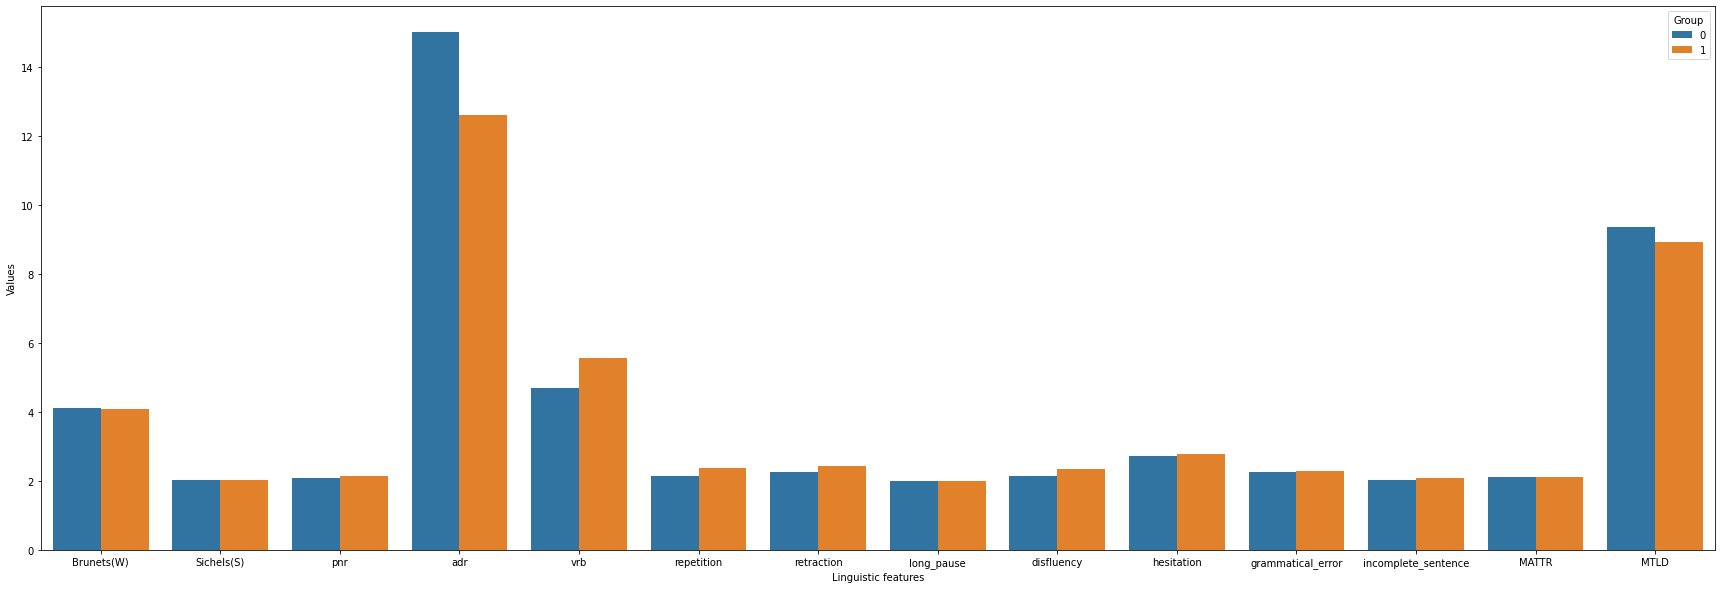

In [ ]:
from numpy.core.fromnumeric import size
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
sns.barplot(x = 'Linguistic features',
            y = 'Values',
            hue = 'Group',
            data = analysis_df
            )

# plt.show()


In [ ]:
df

,label,sentence,text,pos_text,pos_,pos_text_complete,pos_complete,new_text,text_for_POS,MATTR,...,vrb,Brunets(W),Sichels(S),repetition,retraction,long_pause,disfluency,hesitation,grammatical_error,incomplete_sentence
0,1,"[water's runnin(g) over the sink . , and she's...",water's runnin(g) over the sink . and she's i...,water NOUN 's PART runnin(g NOUN ) PUNCT over ...,NOUN PART NOUN PUNCT ADP DET NOUN PUNCT SPACE ...,water noun 's particle runnin(g noun ) punctua...,noun particle noun punctuation adposition dete...,water's runnin [ incomplete_word ] over the si...,water's runnin over the sink . and she's ign...,0.554667,...,13.111111,9.823334,0.358974,0,0,0,1,1,0,1
1,1,"[yes . [+ exc] , the water ? [+ exc] , well le...",yes . [+ exc] the water ? [+ exc] well let's...,yes INTJ . PUNCT [ X + X exc X ] X SPACE the...,INTJ PUNCT X X X X SPACE DET NOUN PUNCT X X X ...,yes interjection . punctuation [ other + other...,interjection punctuation other other other oth...,yes . the water ? well let's see . there...,yes . the water ? well let's see . there...,0.471098,...,18.038462,13.905223,0.147059,20,4,0,6,20,3,5
2,0,"[well I see the sink overflowin(g) . , the mot...",well I see the sink overflowin(g) . the mothe...,well INTJ I PRON see VERB the DET sink NOUN ov...,INTJ PRON VERB DET NOUN ADV PUNCT PUNCT SPACE ...,well interjection I pronoun see verb the deter...,interjection pronoun verb determiner noun adve...,well I see the sink overflowin [ incomplete_wo...,well I see the sink overflowin . the mother ...,0.587727,...,11.333333,9.388525,0.139535,0,2,0,1,0,0,0
3,1,[well the kid is it fallin(g) off the stool &=...,well the kid is it fallin(g) off the stool &=l...,well INTJ the DET kid NOUN is AUX it PRON fall...,INTJ DET NOUN AUX PRON ADJ PUNCT ADP DET PROPN...,well interjection the determiner kid noun is a...,interjection determiner noun auxiliary pronoun...,well the kid is it fallin [ incomplete_word ] ...,well the kid is it fallin off the stool . a...,0.378056,...,44.250000,11.013192,0.096774,6,2,0,2,3,0,2
4,1,"[what's going on ? [+ exc] , well she's doing ...",what's going on ? [+ exc] well she's doing th...,what PRON 's AUX going VERB on ADP ? PUNCT [ X...,PRON AUX VERB ADP PUNCT X X X X SPACE INTJ PRO...,what pronoun 's auxiliary going verb on adposi...,pronoun auxiliary verb adposition punctuation ...,what's going on ? well she's doing the dishe...,what's going on ? well she's doing the dishe...,0.552424,...,13.000000,9.871156,0.177778,0,2,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,"[this picture ? [+ exc] [+ gram] , well, there...","this picture ? [+ exc] [+ gram] well, there's...",this DET picture NOUN ? PUNCT [ X + X exc NOUN...,DET NOUN PUNCT X X NOUN X X X NOUN PUNCT SPACE...,this determiner picture noun ? punctuation [ o...,determiner noun punctuation other other noun o...,"this picture ? [ grammatical_error ] well, t...","this picture ? well, there's a kid on a sto...",0.622990,...,13.357143,13.160295,0.152672,4,6,0,3,10,2,1
544,1,"[okay . [+ exc] , the boy is getting cookies f...",okay . [+ exc] the boy is getting cookies fro...,okay INTJ . PUNCT [ X + X exc X ] X SPACE th...,INTJ PUNCT X X X X SPACE DET NOUN AUX VERB NOU...,okay interjection . punctuation [ other + othe...,interjection punctuation other other other oth...,okay . the boy is getting cookies from the c...,okay . the boy is getting cookies from the c...,0.546316,...,10.076923,9.767338,0.136364,2,1,0,1,1,0,0
545,1,[&=clears:throat okay Junior's in the <kɪkɪ@u ...,&=clears:throat okay Junior's in the <kɪkɪ@u [...,& CCONJ = NOUN clears VERB : PUNCT throat NOUN...,CCONJ NOUN VERB PUNCT NOUN INTJ PROPN PART ADP...,& Cconjunction = noun clears verb : punctuatio...,Cconjunction noun verb punctuation noun interj...,[ action ]throat okay Junior's in the kɪkɪ [ a...,throat okay Junior's in the kɪkɪ jar cookie...,0.650417,...,16.250000,8.964121,0.181818,0,2,0,1,2,0,0
546,1,"[wahoo ho ho . [+ exc] , well it

In [ ]:
df.drop(['sentence', 'pos_text_complete'], axis=1)

,label,text,pos_text,pos_,pos_complete,new_text,text_for_POS,MATTR,MTLD,pnr,...,vrb,Brunets(W),Sichels(S),repetition,retraction,long_pause,disfluency,hesitation,grammatical_error,incomplete_sentence
0,1,water's runnin(g) over the sink . and she's i...,water NOUN 's PART runnin(g NOUN ) PUNCT over ...,NOUN PART NOUN PUNCT ADP DET NOUN PUNCT SPACE ...,noun particle noun punctuation adposition dete...,water's runnin [ incomplete_word ] over the si...,water's runnin over the sink . and she's ign...,0.554667,33.356280,1.142857,...,13.111111,9.823334,0.358974,0,0,0,1,1,0,1
1,1,yes . [+ exc] the water ? [+ exc] well let's...,yes INTJ . PUNCT [ X + X exc X ] X SPACE the...,INTJ PUNCT X X X X SPACE DET NOUN PUNCT X X X ...,interjection punctuation other other other oth...,yes . the water ? well let's see . there...,yes . the water ? well let's see . there...,0.471098,19.639311,1.584906,...,18.038462,13.905223,0.147059,20,4,0,6,20,3,5
2,0,well I see the sink overflowin(g) . the mothe...,well INTJ I PRON see VERB the DET sink NOUN ov...,INTJ PRON VERB DET NOUN ADV PUNCT PUNCT SPACE ...,interjection pronoun verb determiner noun adve...,well I see the sink overflowin [ incomplete_wo...,well I see the sink overflowin . the mother ...,0.587727,26.000000,0.100000,...,11.333333,9.388525,0.139535,0,2,0,1,0,0,0
3,1,well the kid is it fallin(g) off the stool &=l...,well INTJ the DET kid NOUN is AUX it PRON fall...,INTJ DET NOUN AUX PRON ADJ PUNCT ADP DET PROPN...,interjection determiner noun auxiliary pronoun...,well the kid is it fallin [ incomplete_word ] ...,well the kid is it fallin off the stool . a...,0.378056,12.210539,0.750000,...,44.250000,11.013192,0.096774,6,2,0,2,3,0,2
4,1,what's going on ? [+ exc] well she's doing th...,what PRON 's AUX going VERB on ADP ? PUNCT [ X...,PRON AUX VERB ADP PUNCT X X X X SPACE INTJ PRO...,pronoun auxiliary verb adposition punctuation ...,what's going on ? well she's doing the dishe...,what's going on ? well she's doing the dishe...,0.552424,25.072725,0.944444,...,13.000000,9.871156,0.177778,0,2,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,"this picture ? [+ exc] [+ gram] well, there's...",this DET picture NOUN ? PUNCT [ X + X exc NOUN...,DET NOUN PUNCT X X NOUN X X X NOUN PUNCT SPACE...,determiner noun punctuation other other noun o...,"this picture ? [ grammatical_error ] well, t...","this picture ? well, there's a kid on a sto...",0.622990,32.000720,0.791667,...,13.357143,13.160295,0.152672,4,6,0,3,10,2,1
544,1,okay . [+ exc] the boy is getting cookies fro...,okay INTJ . PUNCT [ X + X exc X ] X SPACE th...,INTJ PUNCT X X X X SPACE DET NOUN AUX VERB NOU...,interjection punctuation other other other oth...,okay . the boy is getting cookies from the c...,okay . the boy is getting cookies from the c...,0.546316,19.532429,0.333333,...,10.076923,9.767338,0.136364,2,1,0,1,1,0,0
545,1,&=clears:throat okay Junior's in the <kɪkɪ@u [...,& CCONJ = NOUN clears VERB : PUNCT throat NOUN...,CCONJ NOUN VERB PUNCT NOUN INTJ PROPN PART ADP...,Cconjunction noun verb punctuation noun interj...,[ action ]throat okay Junior's in the kɪkɪ [ a...,throat okay Junior's in the kɪkɪ jar cookie...,0.650417,77.000000,0.346154,...,16.250000,8.964121,0.181818,0,2,0,1,2,0,0
546,1,wahoo ho ho . [+ exc] well it's kind_of a cal...,wahoo PROPN ho PROPN ho PROPN . PUNCT [ X + X ...,PROPN PROPN PROPN PUNCT X X X X SPACE INTJ PRO...,proper noun proper noun proper noun punctuatio...,wahoo ho ho . well it's kind_of a calamity i...,wahoo ho ho . well it's kind_of a calamity i...,0.609565,39.649358,0.500000,...,10.727273,8.923179,0.137255,0,3,0,2,2,0,1


In [ ]:
list(df.columns)

['label',
 'sentence',
 'text',
 'pos_text',
 'pos_',
 'pos_text_complete',
 'pos_complete',
 'new_text',
 'text_for_POS',
 'MATTR',
 'MTLD',
 'pnr',
 'adr',
 'vrb',
 'Brunets(W)',
 'Sichels(S)',
 'repetition',
 'retraction',
 'long_pause',
 'disfluency',
 'hesitation',
 'grammatical_error',
 'incomplete_sentence']

# Storing dataset in csv

In [ ]:
df.to_csv('cookie_tagged_complete.csv', index = False, sep = ';')



```
# This is formatted as code
```

# Frequency rates and ratios

In [ ]:
#pronoun-noun ratio
pnr=[]
pronoun=0
noun=0
#adverb frquency
adr=[]
adverb=0
#verb frquency rate
vrb=[]
verb=0
for i in range(len(df['pos_'])):
  temp=df['pos_'][i].split()
  pronoun=0
  noun=0
  verb=0
  adverb=0
  for j in temp:
    if(j=="PRON"):
      pronoun+=1
    elif(j=="NOUN"):
      noun+=1
    elif(j=="ADV"):
      adverb+=1
    elif(j=="VERB"):
      verb+=1
  vrb.append(len(temp)/verb)
  pnr.append(pronoun/noun)
  if(adverb!=0):
    adr.append(len(temp)/adverb)
  elif(adverb==0):
    adr.append(0)

#pnr_final = [float(i)/sum(pnr) for i in pnr]
print(pnr)
print(adr)
print(vrb)


[1.1428571428571428, 1.5849056603773586, 0.1, 0.75, 0.9444444444444444, 0.35, 0.2222222222222222, 1.0, 0.7, 0.3333333333333333, 0.07407407407407407, 0.3076923076923077, 0.5, 0.25, 0.26666666666666666, 0.4230769230769231, 0.36666666666666664, 0.6923076923076923, 0.2222222222222222, 0.6363636363636364, 0.391304347826087, 0.5, 0.18181818181818182, 0.44, 0.5263157894736842, 0.2727272727272727, 1.0526315789473684, 1.8461538461538463, 1.3333333333333333, 0.6190476190476191, 0.6666666666666666, 0.7857142857142857, 0.358974358974359, 0.5263157894736842, 0.6, 0.23529411764705882, 0.75, 0.4117647058823529, 0.42857142857142855, 0.32, 0.375, 0.3142857142857143, 0.632183908045977, 0.6666666666666666, 0.5294117647058824, 0.7619047619047619, 0.37037037037037035, 0.5, 0.43478260869565216, 0.5348837209302325, 0.5833333333333334, 0.7857142857142857, 0.2777777777777778, 0.6842105263157895, 1.0555555555555556, 0.4375, 0.7307692307692307, 0.5714285714285714, 0.5416666666666666, 0.8846153846153846, 0.388888

In [ ]:
df

,label,sentence,text,pos_text,pos_,pos_text_complete,pos_complete,new_text,text_for_POS,MATTR,...,vrb,Brunets(W),Sichels(S),repetition,retraction,long_pause,disfluency,hesitation,grammatical_error,incomplete_sentence
0,1,"[water's runnin(g) over the sink . , and she's...",water's runnin(g) over the sink . and she's i...,water NOUN 's PART runnin(g NOUN ) PUNCT over ...,NOUN PART NOUN PUNCT ADP DET NOUN PUNCT SPACE ...,water noun 's particle runnin(g noun ) punctua...,noun particle noun punctuation adposition dete...,water's runnin [ incomplete_word ] over the si...,water's runnin over the sink . and she's ign...,0.554667,...,13.111111,9.823334,0.358974,0,0,0,1,1,0,1
1,1,"[yes . [+ exc] , the water ? [+ exc] , well le...",yes . [+ exc] the water ? [+ exc] well let's...,yes INTJ . PUNCT [ X + X exc X ] X SPACE the...,INTJ PUNCT X X X X SPACE DET NOUN PUNCT X X X ...,yes interjection . punctuation [ other + other...,interjection punctuation other other other oth...,yes . the water ? well let's see . there...,yes . the water ? well let's see . there...,0.471098,...,18.038462,13.905223,0.147059,20,4,0,6,20,3,5
2,0,"[well I see the sink overflowin(g) . , the mot...",well I see the sink overflowin(g) . the mothe...,well INTJ I PRON see VERB the DET sink NOUN ov...,INTJ PRON VERB DET NOUN ADV PUNCT PUNCT SPACE ...,well interjection I pronoun see verb the deter...,interjection pronoun verb determiner noun adve...,well I see the sink overflowin [ incomplete_wo...,well I see the sink overflowin . the mother ...,0.587727,...,11.333333,9.388525,0.139535,0,2,0,1,0,0,0
3,1,[well the kid is it fallin(g) off the stool &=...,well the kid is it fallin(g) off the stool &=l...,well INTJ the DET kid NOUN is AUX it PRON fall...,INTJ DET NOUN AUX PRON ADJ PUNCT ADP DET PROPN...,well interjection the determiner kid noun is a...,interjection determiner noun auxiliary pronoun...,well the kid is it fallin [ incomplete_word ] ...,well the kid is it fallin off the stool . a...,0.378056,...,44.250000,11.013192,0.096774,6,2,0,2,3,0,2
4,1,"[what's going on ? [+ exc] , well she's doing ...",what's going on ? [+ exc] well she's doing th...,what PRON 's AUX going VERB on ADP ? PUNCT [ X...,PRON AUX VERB ADP PUNCT X X X X SPACE INTJ PRO...,what pronoun 's auxiliary going verb on adposi...,pronoun auxiliary verb adposition punctuation ...,what's going on ? well she's doing the dishe...,what's going on ? well she's doing the dishe...,0.552424,...,13.000000,9.871156,0.177778,0,2,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,"[this picture ? [+ exc] [+ gram] , well, there...","this picture ? [+ exc] [+ gram] well, there's...",this DET picture NOUN ? PUNCT [ X + X exc NOUN...,DET NOUN PUNCT X X NOUN X X X NOUN PUNCT SPACE...,this determiner picture noun ? punctuation [ o...,determiner noun punctuation other other noun o...,"this picture ? [ grammatical_error ] well, t...","this picture ? well, there's a kid on a sto...",0.622990,...,13.357143,13.160295,0.152672,4,6,0,3,10,2,1
544,1,"[okay . [+ exc] , the boy is getting cookies f...",okay . [+ exc] the boy is getting cookies fro...,okay INTJ . PUNCT [ X + X exc X ] X SPACE th...,INTJ PUNCT X X X X SPACE DET NOUN AUX VERB NOU...,okay interjection . punctuation [ other + othe...,interjection punctuation other other other oth...,okay . the boy is getting cookies from the c...,okay . the boy is getting cookies from the c...,0.546316,...,10.076923,9.767338,0.136364,2,1,0,1,1,0,0
545,1,[&=clears:throat okay Junior's in the <kɪkɪ@u ...,&=clears:throat okay Junior's in the <kɪkɪ@u [...,& CCONJ = NOUN clears VERB : PUNCT throat NOUN...,CCONJ NOUN VERB PUNCT NOUN INTJ PROPN PART ADP...,& Cconjunction = noun clears verb : punctuatio...,Cconjunction noun verb punctuation noun interj...,[ action ]throat okay Junior's in the kɪkɪ [ a...,throat okay Junior's in the kɪkɪ jar cookie...,0.650417,...,16.250000,8.964121,0.181818,0,2,0,1,2,0,0
546,1,"[wahoo ho ho . [+ exc] , well it

# Preparing LogReg model

In [ ]:
pip install --upgrade joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
import joblib
import sys
import string

In [ ]:
df=pd.read_csv('cookie_tagged_complete.csv', sep=";")
df.head(3)

,label,sentence,text,pos_text,pos_,pos_text_complete,pos_complete,new_text,text_for_POS,MATTR,...,vrb,Brunets(W),Sichels(S),repetition,retraction,long_pause,disfluency,hesitation,grammatical_error,incomplete_sentence
0,1,"[""water's runnin(g) over the sink . "", ""and sh...",water's runnin(g) over the sink . and she's i...,water NOUN 's PART runnin(g NOUN ) PUNCT over ...,NOUN PART NOUN PUNCT ADP DET NOUN PUNCT SPACE ...,water noun 's particle runnin(g noun ) punctua...,noun particle noun punctuation adposition dete...,water's runnin [ incomplete_word ] over the si...,water's runnin over the sink . and she's ign...,0.554667,...,13.111111,9.823334,0.358974,0,0,0,1,1,0,1
1,1,"['yes . [+ exc] ', 'the water ? [+ exc] ', ""we...",yes . [+ exc] the water ? [+ exc] well let's...,yes INTJ . PUNCT [ X + X exc X ] X SPACE the...,INTJ PUNCT X X X X SPACE DET NOUN PUNCT X X X ...,yes interjection . punctuation [ other + other...,interjection punctuation other other other oth...,yes . the water ? well let's see . there...,yes . the water ? well let's see . there...,0.471098,...,18.038462,13.905223,0.147059,20,4,0,6,20,3,5
2,0,"['well I see the sink overflowin(g) . ', 'the ...",well I see the sink overflowin(g) . the mothe...,well INTJ I PRON see VERB the DET sink NOUN ov...,INTJ PRON VERB DET NOUN ADV PUNCT PUNCT SPACE ...,well interjection I pronoun see verb the deter...,interjection pronoun verb determiner noun adve...,well I see the sink overflowin [ incomplete_wo...,well I see the sink overflowin . the mother ...,0.587727,...,11.333333,9.388525,0.139535,0,2,0,1,0,0,0


In [ ]:
len(df)

548

In [ ]:
df['control'] = df.apply(lambda x: 1 if x['label'] == 0 else 0, axis = 1 )
df['dementia'] = df.apply(lambda x: 1 if x['label'] == 1 else 0, axis = 1 )

In [ ]:
df.head(3)

,label,sentence,text,pos_text,pos_,pos_text_complete,pos_complete,new_text,text_for_POS,MATTR,...,Sichels(S),repetition,retraction,long_pause,disfluency,hesitation,grammatical_error,incomplete_sentence,control,dementia
0,1,"[""water's runnin(g) over the sink . "", ""and sh...",water's runnin(g) over the sink . and she's i...,water NOUN 's PART runnin(g NOUN ) PUNCT over ...,NOUN PART NOUN PUNCT ADP DET NOUN PUNCT SPACE ...,water noun 's particle runnin(g noun ) punctua...,noun particle noun punctuation adposition dete...,water's runnin [ incomplete_word ] over the si...,water's runnin over the sink . and she's ign...,0.554667,...,0.358974,0,0,0,1,1,0,1,0,1
1,1,"['yes . [+ exc] ', 'the water ? [+ exc] ', ""we...",yes . [+ exc] the water ? [+ exc] well let's...,yes INTJ . PUNCT [ X + X exc X ] X SPACE the...,INTJ PUNCT X X X X SPACE DET NOUN PUNCT X X X ...,yes interjection . punctuation [ other + other...,interjection punctuation other other other oth...,yes . the water ? well let's see . there...,yes . the water ? well let's see . there...,0.471098,...,0.147059,20,4,0,6,20,3,5,0,1
2,0,"['well I see the sink overflowin(g) . ', 'the ...",well I see the sink overflowin(g) . the mothe...,well INTJ I PRON see VERB the DET sink NOUN ov...,INTJ PRON VERB DET NOUN ADV PUNCT PUNCT SPACE ...,well interjection I pronoun see verb the deter...,interjection pronoun verb determiner noun adve...,well I see the sink overflowin [ incomplete_wo...,well I see the sink overflowin . the mother ...,0.587727,...,0.139535,0,2,0,1,0,0,0,1,0


In [ ]:
train,test = train_test_split(df, test_size=0.15, random_state=61)

In [ ]:
len(train)

465

In [ ]:
len(test)

83

In [ ]:
lengths=train.text.str.len()
lengths.mean(), lengths.std(), lengths.max()

(644.4623655913979, 338.98239449057576, 2802)

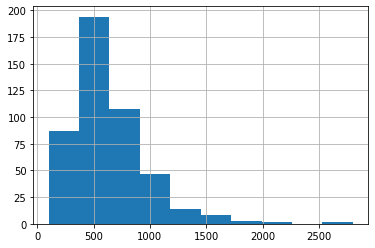

In [ ]:
lengths.hist()

In [ ]:
label_cols = ['control', 'dementia']

In [ ]:
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [ ]:
COL='pos_text_complete'
def docs_for_column(column):
    n = train.shape[0]
    vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
    trn_term_doc = vec.fit_transform(train[column])
    test_term_doc = vec.transform(test[column])
    return trn_term_doc, test_term_doc

trn_term_doc, test_term_doc = docs_for_column(COL)

In [ ]:
trn_term_doc, test_term_doc

(<465x3614 sparse matrix of type '<class 'numpy.float64'>'
 	with 113300 stored elements in Compressed Sparse Row format>,
 <83x3614 sparse matrix of type '<class 'numpy.float64'>'
 	with 20696 stored elements in Compressed Sparse Row format>)

In [ ]:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [ ]:
x = trn_term_doc
test_x = test_term_doc

In [ ]:
def get_mdl(y):
    y = y.values

    r = np.log(pr(1,y) / pr(0,y))
    #m = LogisticRegression(C=4, dual=True)
    #m = LogisticRegression(C=8, dual=False, solver='newton-cg', class_weight='balanced')
    m = LogisticRegression(C=10, dual=False, solver='newton-cg', class_weight='balanced')
    x_nb = x.multiply(r)

    return m.fit(x_nb, y), r

In [ ]:
preds = np.zeros((len(test), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m, r = get_mdl(train[j])

    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit control
fit dementia


In [ ]:
y_hat = preds[:,1] > preds[:,0]   # bools
y_hat = [int(x) for x in y_hat]   # ints

In [ ]:
print(metrics.classification_report(test['label'], y_hat))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        28
           1       0.88      0.84      0.86        55

    accuracy                           0.82        83
   macro avg       0.80      0.81      0.80        83
weighted avg       0.83      0.82      0.82        83



In [ ]:
print(metrics.accuracy_score(test['label'], y_hat))

0.8192771084337349


# Other models

In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.metrics import accuracy_score, log_loss

In [ ]:
models_f1 = []
models_f1.append((LogisticRegression()))
models_f1.append(( KNeighborsClassifier()))
models_f1.append((DecisionTreeClassifier()))
models_f1.append((MultinomialNB()))
models_f1.append((SVC(kernel="linear", C=0.1,probability=True)))
models_f1.append((RandomForestClassifier()))
models_f1.append((AdaBoostClassifier()))

In [ ]:
train,test = train_test_split(df, test_size=0.15, random_state=61)

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english',max_features=1000,min_df=5, max_df=0.9)
X = vectorizer.fit_transform(df['new_text'].tolist())

In [ ]:
X.shape

(548, 427)

In [ ]:
sorted([x for x in zip(vectorizer.get_feature_names(), vectorizer.idf_)], key=lambda x:x[1], reverse=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


[('accident', 5.516338972281476),
 ('actually', 5.516338972281476),
 ('aren', 5.516338972281476),
 ('begging', 5.516338972281476),
 ('beginning', 5.516338972281476),
 ('bout', 5.516338972281476),
 ('cake', 5.516338972281476),
 ('cascading', 5.516338972281476),
 ('closet', 5.516338972281476),
 ('dangerous', 5.516338972281476),
 ('dishwasher', 5.516338972281476),
 ('driveway', 5.516338972281476),
 ('drop', 5.516338972281476),
 ('dropped', 5.516338972281476),
 ('family', 5.516338972281476),
 ('finished', 5.516338972281476),
 ('girls', 5.516338972281476),
 ('grab', 5.516338972281476),
 ('happy', 5.516338972281476),
 ('hard', 5.516338972281476),
 ('hedges', 5.516338972281476),
 ('hunh', 5.516338972281476),
 ('knows', 5.516338972281476),
 ('leg', 5.516338972281476),
 ('lip', 5.516338972281476),
 ('means', 5.516338972281476),
 ('mommy', 5.516338972281476),
 ('near', 5.516338972281476),
 ('ones', 5.516338972281476),
 ('outta', 5.516338972281476),
 ('overflowed', 5.516338972281476),
 ('overrunn

In [ ]:

y= np.array(df['label'].tolist())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=61)

In [ ]:
import sklearn

LogisticRegression
****Results****
Accuracy: 83.1325%
****F1 score,Precision and recall****
f1_score: 0.8144955300127714 , Precison: 0.810062893081761, Recall: 0.82012987012987, Individual_f1: [0.75862069 0.87037037]
(array([0.88679245, 0.73333333]), array([0.85454545, 0.78571429]), array([0.87037037, 0.75862069]), array([55, 28]))
***confusion matrix****


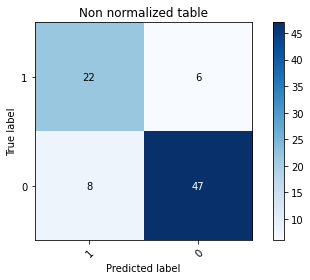

Log Loss: 0.4460793393251248
KNeighborsClassifier
****Results****
Accuracy: 84.3373%
****F1 score,Precision and recall****
f1_score: 0.8263318847577659 , Precison: 0.8237547892720306, Recall: 0.8292207792207792, Individual_f1: [0.77192982 0.88073394]
(array([0.88888889, 0.75862069]), array([0.87272727, 0.78571429]), array([0.88073394, 0.77192982]), array([55, 28]))
***confusion matrix****


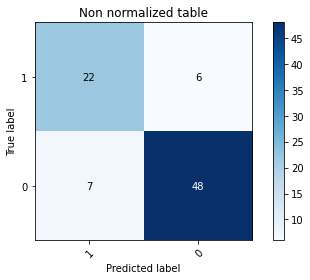

Log Loss: 0.7855490053793195
DecisionTreeClassifier
****Results****
Accuracy: 60.2410%
****F1 score,Precision and recall****
f1_score: 0.5591501690004829 , Precison: 0.5587484035759898, Recall: 0.5597402597402598, Individual_f1: [0.42105263 0.69724771]
(array([0.7037037, 0.4137931]), array([0.69090909, 0.42857143]), array([0.69724771, 0.42105263]), array([55, 28]))
***confusion matrix****


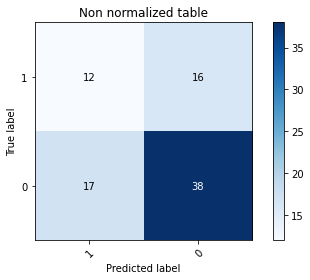

Log Loss: 13.732284590747621
MultinomialNB
****Results****
Accuracy: 79.5181%
****F1 score,Precision and recall****
f1_score: 0.7797033567525371 , Precison: 0.7733333333333333, Recall: 0.7928571428571429, Individual_f1: [0.72131148 0.83809524]
(array([0.88      , 0.66666667]), array([0.8       , 0.78571429]), array([0.83809524, 0.72131148]), array([55, 28]))
***confusion matrix****


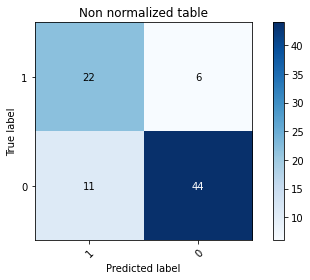

Log Loss: 0.4601415045481131
SVC
****Results****
Accuracy: 79.5181%
****F1 score,Precision and recall****
f1_score: 0.7825550932347048 , Precison: 0.7764880952380953, Recall: 0.8016233766233767, Individual_f1: [0.73015873 0.83495146]
(array([0.89583333, 0.65714286]), array([0.78181818, 0.82142857]), array([0.83495146, 0.73015873]), array([55, 28]))
***confusion matrix****


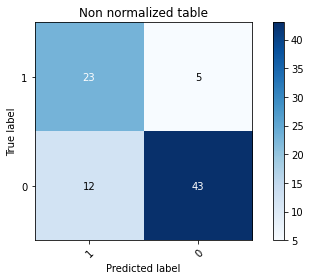

Log Loss: 0.46401671436320757
RandomForestClassifier
****Results****
Accuracy: 75.9036%
****F1 score,Precision and recall****
f1_score: 0.7349936143039593 , Precison: 0.7317610062893082, Recall: 0.7392857142857143, Individual_f1: [0.65517241 0.81481481]
(array([0.83018868, 0.63333333]), array([0.8       , 0.67857143]), array([0.81481481, 0.65517241]), array([55, 28]))
***confusion matrix****


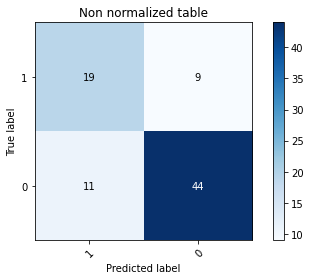

Log Loss: 0.4891866440441333
AdaBoostClassifier
****Results****
Accuracy: 72.2892%
****F1 score,Precision and recall****
f1_score: 0.6873054873054872 , Precison: 0.6891534391534391, Recall: 0.6857142857142857, Individual_f1: [0.58181818 0.79279279]
(array([0.78571429, 0.59259259]), array([0.8       , 0.57142857]), array([0.79279279, 0.58181818]), array([55, 28]))
***confusion matrix****


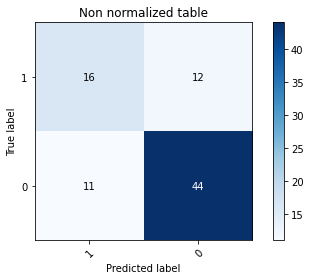

Log Loss: 0.6398301294040964


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
%matplotlib inline
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
for clf in models_f1:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    print('****F1 score,Precision and recall****')
    f1_score = sklearn.metrics.f1_score(y_test, train_predictions,average='macro')
    Precision = sklearn.metrics.precision_score(y_test, train_predictions,average='macro')
    Recall = sklearn.metrics.recall_score(y_test, train_predictions,average='macro')
    individual_f1 = sklearn.metrics.f1_score(y_test, train_predictions, average=None)
    print("f1_score: {} , Precison: {}, Recall: {}, Individual_f1: {}".format(f1_score,Precision,Recall,individual_f1))
    print(precision_recall_fscore_support(y_test, train_predictions, average=None, labels=df['label'].unique()))
    print('***confusion matrix****')
    classes = df['label'].unique()
    cm = confusion_matrix(y_test, train_predictions)
    fig, ax = plt.subplots()
    cmap=plt.cm.Blues
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title="Non normalized table",
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    normalize = False
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

#Feature Union

In [ ]:
df = pd.read_csv('/content/cookie_tagged_complete.csv')
df

ParserError: ignored

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['label']),df['label'],test_size=0.15, random_state=61)
X_test

In [ ]:
text = list(X_train.select_dtypes(exclude=['number']).columns)

# Define numerical columns
numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

In [ ]:
df['pos_text_complete']

In [ ]:
import numpy as np
import pandas as pd
from seaborn import load_dataset

# Import modules for feature engineering and modelling
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold


In [ ]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]
class TextSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X['pos_text_complete']

cat_pipe = Pipeline([
    ('selector', TextSelector('pos_text_complete')),
    ('vec', TfidfVectorizer(analyzer='word'))
])

# Define numerical pipeline
num_pipe = Pipeline([
    ('selector', ColumnSelector(numerical)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Combine categorical and numerical pipeline
preprocessor = FeatureUnion([
    ('cat', cat_pipe),
    ('num', num_pipe)
])

# Combine categorical and numerical pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])
pipe.fit(X_train, y_train)

# Predict training data
y_train_pred = pipe.predict(X_train)
print(f"Predictions on training data: {y_train_pred}")

# Predict test data
y_test_pred = pipe.predict(X_test)

print(f"Predictions on test data: {y_test_pred}")

In [ ]:
y_test_pred

In [ ]:
np.array(y_test)

In [ ]:
print(metrics.classification_report(np.array(y_test), y_test_pred))

In [ ]:


# Create Function Transformer to use Feature Union
# def get_numeric_data(x):
#     return [record[:-2] for record in x]

# def get_text_data(x):
#     return [record[-1] for record in x]

# transfomer_numeric = FunctionTransformer(get_numeric_data)
# transformer_text = FunctionTransformer(get_text_data)

# Create a pipeline to concatenate Tfidf Vector and Numeric data
# Use RandomForestClassifier as an example

class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]

class TextSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X['pos_text_complete']


pipeline = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', ColumnSelector(numerical))
            ])),
             ('text_features', Pipeline([
                ('selector', TextSelector('pos_text_complete')),
                ('vec', TfidfVectorizer(analyzer='word'))
            ]))
         ])),
    ('clf', RandomForestClassifier())
])



# Grid Search Parameters for RandomForest
param_grid = {'clf__n_estimators': np.linspace(1, 100, 10, dtype=int),
              'clf__min_samples_split': [3, 10],
              'clf__min_samples_leaf': [3],
              'clf__max_features': [10],
              'clf__max_depth': [None],
              'clf__criterion': ['gini'],
              'clf__bootstrap': [False]}

# Training config
kfold = StratifiedKFold(n_splits=7)
scoring = {'Accuracy': 'accuracy', 'F1': 'f1_macro'}
refit = 'F1'

# Perform GridSearch
rf_model = GridSearchCV(pipeline, param_grid=param_grid, cv=kfold, scoring=scoring,
                         refit=refit, n_jobs=-1, return_train_score=True, verbose=1)
rf_model.fit(X_train, y_train)
rf_best = rf_model.best_estimator_
